In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
from scipy import stats
from scipy.stats import norm, skew, kurtosis


In [ ]:
#Cargar el Dataset
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#Leer el Dataset
%cd '/content/gdrive/MyDrive/CoderHouse/Data_Science'
creditcard = pd.read_csv('fraud.csv')

/content/gdrive/MyDrive/CoderHouse/Data_Science


In [ ]:
#Mostrar el Dataset
creditcard

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,199996,3/1/2020 0:02,3.585740e+15,fraud_Kuvalis Ltd,gas_transport,45.60,James,Greene,M,082 Hernandez Bypass Apt. 886,...,34.2956,-99.7494,3202,"Librarian, public",3/18/1998,9726c00bd873467853c3af1b2f0abe8d,1362096171,33.913777,-100.466829,0
199997,199997,3/1/2020 0:06,3.512370e+15,fraud_Bartoletti-Wunsch,gas_transport,57.23,Francisco,Kemp,M,9554 Flores Drive,...,38.4305,-90.3870,35439,Land/geomatics surveyor,3/31/1985,b0762189a450a720f4ee4547fcf6fc7f,1362096363,37.860662,-90.534356,0
199998,199998,3/1/2020 0:07,4.229730e+15,fraud_Welch Inc,misc_net,7.90,Tyler,Mills,M,7838 Jason Squares,...,37.6848,-85.8784,48194,Surgeon,5/3/1990,74fc56abcfe99529b5ebf42a9eb380d5,1362096427,38.119560,-86.804391,0
199999,199999,3/1/2020 0:07,4.390970e+18,fraud_Dooley-Thompson,misc_net,4.52,Kyle,Simmons,M,8149 Harris Divide,...,35.6174,-97.5583,640470,Advertising copywriter,6/24/1966,9ca17325b650b1a6e6acae3fed656d51,1362096456,35.835027,-98.513300,0


In [ ]:
creditcard.shape

(200001, 23)

In [ ]:
creditcard.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,200001.000000,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000,2.000010e+05,2.000010e+05,200001.000000,200001.000000,200001.000000
mean,100000.000000,4.195740e+17,71.122196,48797.818876,38.535025,-90.209092,8.880481e+04,1.343728e+09,38.536209,-90.210839,0.008345
std,57735.459931,1.311470e+18,144.445241,26864.172528,5.082839,13.736120,3.018709e+05,1.587880e+07,5.115922,13.749521,0.090969
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000
25%,50000.000000,1.800360e+14,9.710000,26237.000000,34.620500,-96.790900,7.410000e+02,1.327877e+09,34.723916,-96.867821,0.000000
50%,100000.000000,3.519610e+15,47.960000,48174.000000,39.354300,-87.476900,2.435000e+03,1.330444e+09,39.361998,-87.454358,0.000000
75%,150000.000000,4.642260e+15,83.520000,72011.000000,41.940400,-80.158000,2.032800e+04,1.359547e+09,41.956494,-80.236912,0.000000
max,200000.000000,4.992350e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.362096e+09,66.659242,-66.950902,1.000000


## Crear un nuevo DataFrame con solo columnas numéricas

La primer columna (Unnamed) es solo la numeracion de las filas del dataset, por lo que no sirven para el analisis. Además, latitud y longitud no son medidas numericas, como consecuecia, se van omitir en el análisis. Por lo que estariamos en presecia de datos de monto de transaccion, población y la variable objetivo, si es fraude o no.

In [ ]:
#Eliminando columna sin nombre
creditcard.drop("Unnamed: 0",axis=1,inplace=True)
creditcard.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
#Creando variable de edad a partir de fechas de transacción y fecha de nacimiento.
creditcard['trans_date_trans_time']=pd.to_datetime(creditcard['trans_date_trans_time'])
creditcard['trans_date']=creditcard['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
creditcard['trans_date']=pd.to_datetime(creditcard['trans_date'])
creditcard['dob']=pd.to_datetime(creditcard['dob'])

In [ ]:
creditcard["age"] = creditcard["trans_date_trans_time"]-creditcard["dob"]
creditcard["age"]=creditcard["age"].astype('timedelta64[Y]')
creditcard["age"].head()

0    30.0
1    40.0
2    56.0
3    51.0
4    32.0
Name: age, dtype: float64

In [ ]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

In [ ]:
#Creando columnas de mes y año de transacción

creditcard['trans_month'] = pd.DatetimeIndex(creditcard['trans_date']).month
creditcard['trans_year'] = pd.DatetimeIndex(creditcard['trans_date']).year
import calendar
creditcard['Month_name'] = creditcard['trans_month'].apply(lambda x: calendar.month_abbr[x])


In [ ]:
creditcard.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,trans_month,trans_year
count,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000,2.000010e+05,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000,200001.000000,200001.000000
mean,4.195740e+17,71.122196,48797.818876,38.535025,-90.209092,8.880481e+04,1.343728e+09,38.536209,-90.210839,0.008345,45.259424,1.476403,2019.499998
std,1.311470e+18,144.445241,26864.172528,5.082839,13.736120,3.018709e+05,1.587880e+07,5.115922,13.749521,0.090969,17.387578,0.499514,0.500001
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000,13.000000,1.000000,2019.000000
25%,1.800360e+14,9.710000,26237.000000,34.620500,-96.790900,7.410000e+02,1.327877e+09,34.723916,-96.867821,0.000000,32.000000,1.000000,2019.000000
50%,3.519610e+15,47.960000,48174.000000,39.354300,-87.476900,2.435000e+03,1.330444e+09,39.361998,-87.454358,0.000000,43.000000,1.000000,2019.000000
75%,4.642260e+15,83.520000,72011.000000,41.940400,-80.158000,2.032800e+04,1.359547e+09,41.956494,-80.236912,0.000000,56.000000,2.000000,2020.000000
max,4.992350e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.362096e+09,66.659242,-66.950902,1.000000,95.000000,3.000000,2020.000000


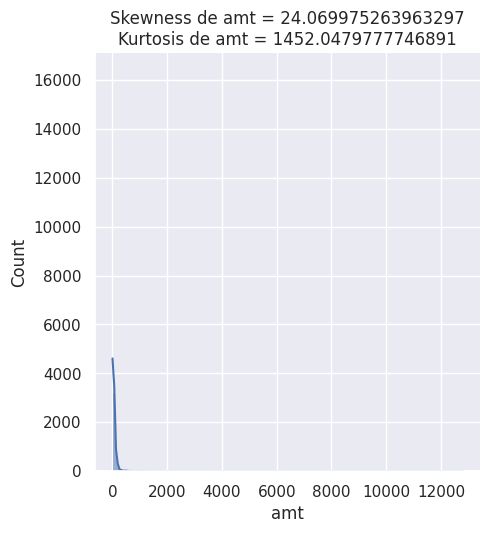

In [ ]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(creditcard['amt']))
kurtosis = str(kurtosis(creditcard['amt'], fisher = False))
sns.displot(creditcard['amt'], kde=True)
plt.title("Skewness de amt"+" = "+skewness +"\n"+"Kurtosis de amt"+" = "+kurtosis)
plt.show()
sns.set(rc={'figure.figsize':(6,7)})

In [ ]:
kurtosis(creditcard['amt'], fisher = False)

1452.0479777746891

In [ ]:
creditcard['amt'].describe()

count    200001.000000
mean         71.122196
std         144.445241
min           1.000000
25%           9.710000
50%          47.960000
75%          83.520000
max       12788.070000
Name: amt, dtype: float64

In [ ]:
z_scores = np.abs(stats.zscore(creditcard['amt']))
z_scores


0         0.457975
1         0.249976
2         1.031451
3         0.180845
4         0.201892
            ...   
199996    0.176692
199997    0.096176
199998    0.437691
199999    0.461091
200000    0.074131
Name: amt, Length: 200001, dtype: float64

In [ ]:
columnzscore = creditcard['amt'][(z_scores < 2)] #considero el 95%
columnzscore.describe()

count    196031.000000
mean         57.258558
std          56.195248
min           1.000000
25%           9.520000
50%          46.560000
75%          80.690000
max         360.010000
Name: amt, dtype: float64

In [ ]:
columnzscore

0           4.97
1         107.23
2         220.11
3          45.00
4          41.96
           ...  
199996     45.60
199997     57.23
199998      7.90
199999      4.52
200000     81.83
Name: amt, Length: 196031, dtype: float64

<Axes: >

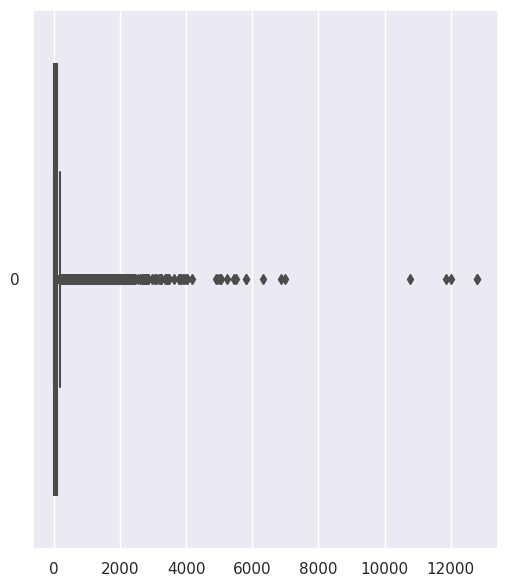

In [ ]:
sns.boxplot(creditcard['amt'], orient='h')

**Interpretación:**

La mayoría de las transacciones están limitadas dentro de un rango muy pequeño, aunque las transacciones de grandes sumas están  presentes, que probablemente sean transacciones fraudulentas.

Por la asimetría que presenta Es un tipo de distribución donde las medidas se dispersan, a diferencia de los datos distribuidos simétricamente donde todas las medidas de tendencia central (media, mediana y moda) son iguales entre sí.
La asimetría positiva extrema no es deseable para la distribución, ya que un alto nivel de asimetría puede causar resultados engañosos, pero es de esperar en este tipo de dataset donde solo una pequeña cantidad de los datos son fraude.
Las herramientas de transformación de datos ayudan a acercar los datos sesgados a una distribución normal.

---




---



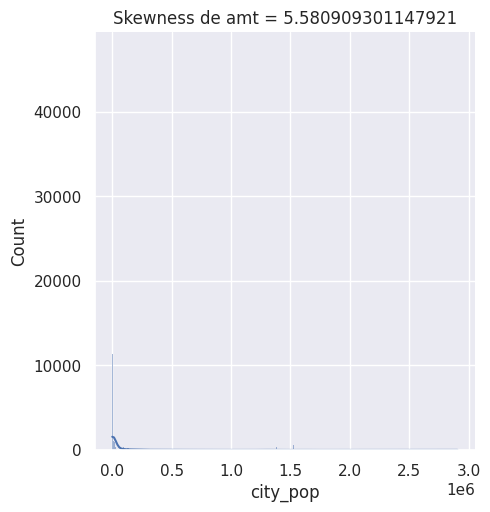

In [ ]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(creditcard['city_pop']))
sns.displot(creditcard['city_pop'], kde=True)
plt.title("Skewness de poblacion"+" = "+skewness)
plt.show()
sns.set(rc={'figure.figsize':(6,7)})

In [ ]:
kurtosis(creditcard['city_pop'], fisher = False)

40.42384455228478

In [ ]:
creditcard['city_pop'].describe()

count    2.000010e+05
mean     8.880481e+04
std      3.018709e+05
min      2.300000e+01
25%      7.410000e+02
50%      2.435000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64

In [ ]:
z_scores = np.abs(stats.zscore(creditcard['city_pop']))
z_scores


0         0.282604
1         0.293689
2         0.280421
3         0.287759
4         0.293854
            ...   
199996    0.283575
199997    0.176784
199998    0.134531
199999    1.827492
200000    0.290204
Name: city_pop, Length: 200001, dtype: float64

In [ ]:
columnzscore = creditcard['city_pop'][(z_scores < 2)] #considero el 95%
columnzscore.describe()


count    192240.000000
mean      36553.649808
std       97245.507483
min          23.000000
25%         722.000000
50%        2263.000000
75%       13983.000000
max      687276.000000
Name: city_pop, dtype: float64

In [ ]:
columnzscore

0           3495
1            149
2           4154
3           1939
4             99
           ...  
199996      3202
199997     35439
199998     48194
199999    640470
200000      1201
Name: city_pop, Length: 192240, dtype: int64

<Axes: >

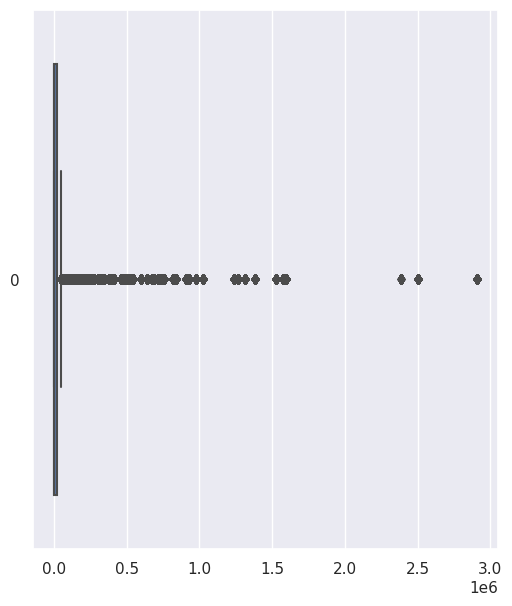

In [ ]:
sns.boxplot(creditcard['city_pop'], orient='h')



---



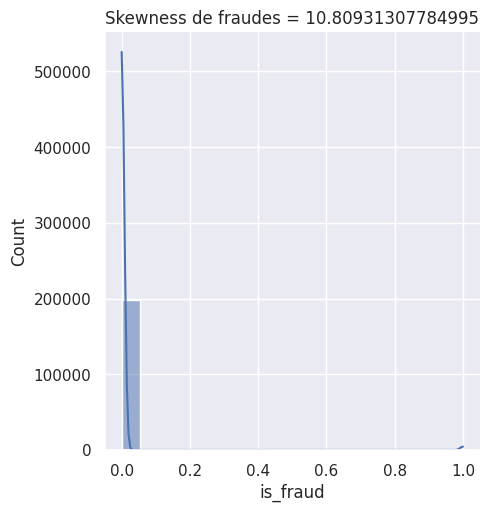

In [ ]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(creditcard['is_fraud']))
sns.displot(creditcard['is_fraud'], kde=True)
plt.title("Skewness de fraudes"+" = "+skewness)
plt.show()
sns.set(rc={'figure.figsize':(6,7)})

In [ ]:
kurtosis(creditcard['is_fraud'], fisher = False)

117.84124921497781

In [ ]:
creditcard['is_fraud'].describe()

count    200001.000000
mean          0.008345
std           0.090969
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_fraud, dtype: float64

In [ ]:
z_scores = np.abs(stats.zscore(creditcard['is_fraud']))
z_scores


0         0.091734
1         0.091734
2         0.091734
3         0.091734
4         0.091734
            ...   
199996    0.091734
199997    0.091734
199998    0.091734
199999    0.091734
200000    0.091734
Name: is_fraud, Length: 200001, dtype: float64

In [ ]:
columnzscore = creditcard['is_fraud'][(z_scores < 2)] #considero el 95%
columnzscore.describe()


count    198332.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: is_fraud, dtype: float64

In [ ]:
columnzscore

0         0
1         0
2         0
3         0
4         0
         ..
199996    0
199997    0
199998    0
199999    0
200000    0
Name: is_fraud, Length: 198332, dtype: int64

<Axes: >

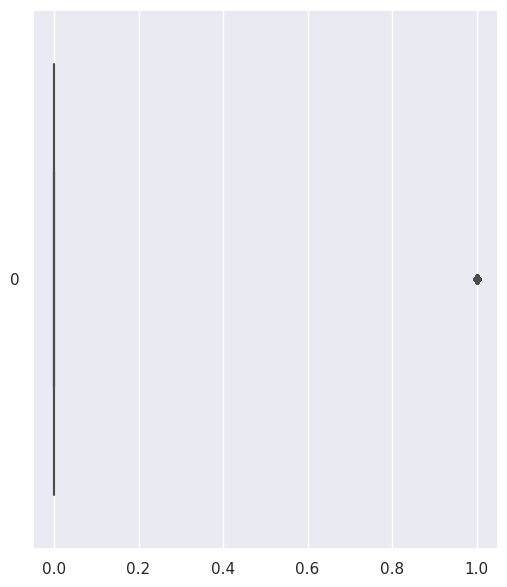

In [ ]:
sns.boxplot(creditcard['is_fraud'], orient='h')



---



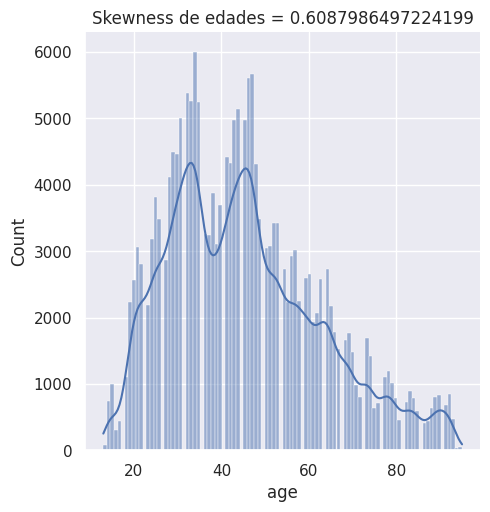

In [ ]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(creditcard['age']))
sns.displot(creditcard['age'], kde=True)
plt.title("Skewness de edades"+" = "+skewness)
plt.show()
sns.set(rc={'figure.figsize':(6,7)})

In [ ]:
kurtosis(creditcard['age'], fisher = False)

2.8247935954959167

In [ ]:
creditcard['age'].describe()

count    200001.000000
mean         45.259424
std          17.387578
min          13.000000
25%          32.000000
50%          43.000000
75%          56.000000
max          95.000000
Name: age, dtype: float64

In [ ]:
z_scores = np.abs(stats.zscore(creditcard['age']))
z_scores


0         0.877607
1         0.302482
2         0.617717
3         0.330155
4         0.762582
            ...   
199996    1.395219
199997    0.647557
199998    0.935120
199999    0.445180
200000    0.302482
Name: age, Length: 200001, dtype: float64

In [ ]:
columnzscore = creditcard['age'][(z_scores < 2)] #considero el 95%
columnzscore.describe()


count    191359.000000
mean         43.367968
std          15.249277
min          13.000000
25%          31.000000
50%          42.000000
75%          54.000000
max          80.000000
Name: age, dtype: float64

In [ ]:
columnzscore

0         30.0
1         40.0
2         56.0
3         51.0
4         32.0
          ... 
199996    21.0
199997    34.0
199998    29.0
199999    53.0
200000    40.0
Name: age, Length: 191359, dtype: float64

<Axes: >

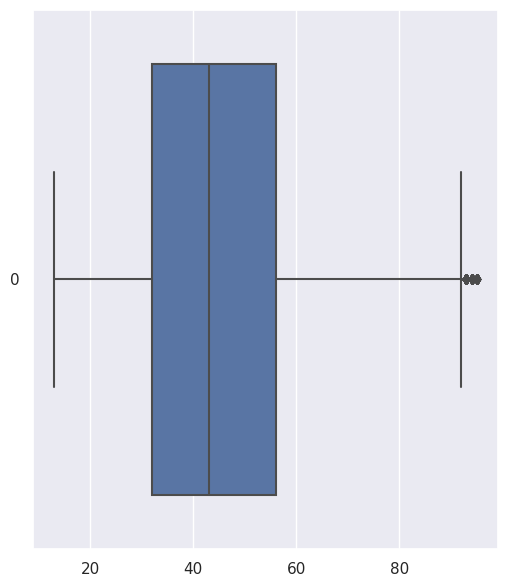

In [ ]:
sns.boxplot(creditcard['age'], orient='h')

Ciertas columnas numéricas no son necesarias para el modelado y, por lo tanto, pueden eliminarse.

Además, muchos de los datos están muy sesgados.

Un indicativo de esto es que la proporción de transacciones sin fraude es mucho mayor que las transacciones fraudulentas, por lo que estamos viendo un conjunto de datos desequilibrado.

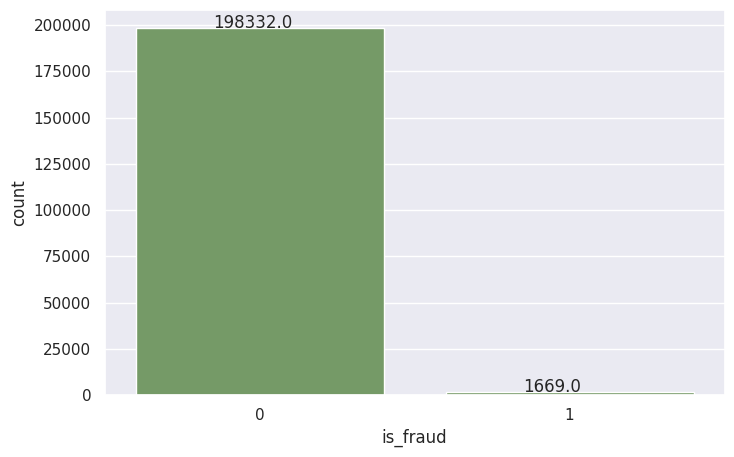

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="is_fraud", data=creditcard,color=randomcolor())
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]

    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])

    return multiple_outliers

In [ ]:
numeric_columns= ['amt', 'city_pop','is_fraud','age']


In [ ]:
# detecting outliers
Outliers_IQR = IQR_method(creditcard,1,numeric_columns)

# dropping outliers
df_out = creditcard.drop(Outliers_IQR, axis = 0).reset_index(drop=True)


Total number of deleted outliers is: 549


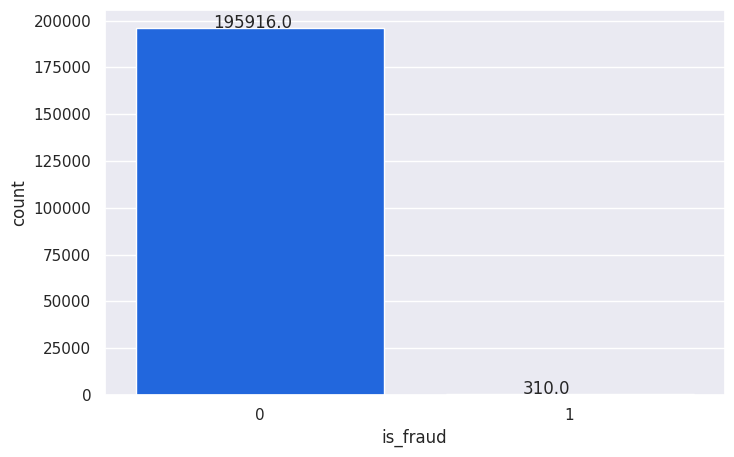

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="is_fraud", data=df_out,color=randomcolor())
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Nos quedamos con sólo 310 transacciones fraudulentas en todo el dataframe!
Se eliminaron casi todas las transacciones fraudulentas, por lo que para su estudio se debería volver la etapa anterior a la eliminación de los valores atípicos.